# FLIGHT PRICE PREDICTION

* Our data was collected from Kaggle.
* Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities.
* There are 300261 datapoints and 11 features in the cleaned dataset.

## PROJECT DESCRIPTION

People who work frequently travel through flight will have better knowledge on best discount and right time to buy the ticket. For the business purpose many airline companies change prices according to the seasons or time duration. They will increase the price when people travel more. Estimating the highest prices of the airlines data for the route is collected with features such as Duration, Source, Destination, Arrival and Departure. Features are taken from chosen dataset and in the price wherein the airline price ticket costs vary overtime. we have implemented flight price prediction for users by using KNN, decision tree and random forest algorithms. Random Forest shows the best accuracy of 80% for predicting the flight price. also, we have done correlation tests and metrics for the statistical analysis.

## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import warnings
from matplotlib.axes import Axes
warnings.filterwarnings('ignore')

## LOADING DATA

In [2]:
df = pd.read_csv("Clean_Dataset.csv")
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## DATA DICTIONARY

The various features of the cleaned dataset are explained below: 1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
    
11) Price: Target variable stores information of the ticket price.

## EXPLORATORY DATA ANALYSIS

In [3]:
# SHAPE OF THE DATA SET
df.shape

(300153, 12)

In [4]:
# COLUMNS NAMES IN THE DATASET
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


* Our dataframe consists of 300153 rows and 11 columns.

* Most of our data is not numerical.

In [7]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


* Our duration feature is slightly right skewed distribution.
* Price is highly skewed to the right, so most of the values lie in left tail.
* Standard Deviation for price is high so there is greater dispersion in data points.

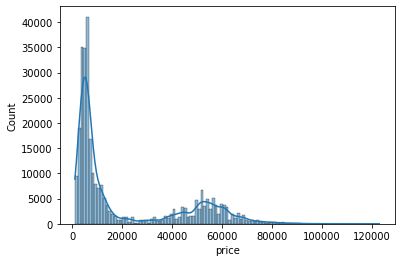

In [8]:
sns.histplot(df['price'], kde=True, )
plt.show()

In [9]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [10]:
df.loc[df.duplicated()]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


* No duplicate data in the dataset.

## DATA CLEANING

In [11]:
categorical_cols = ['airline','source_city','departure_time', 'arrival_time', 'destination_city','class']

In [12]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [13]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

* The dataset looks clean already so we will see for any useless columns by checking column values

In [14]:
for i in categorical_cols:
    a = df[i].value_counts()
    print(a)
    print("*******************")

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
*******************
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
*******************
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
*******************
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64
*******************
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64
*******************
Economy     206666
Business     93487
Name: class, dtype: int64
*******************


## DATA VISUALIZATION

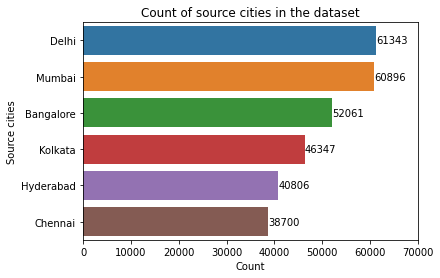

In [15]:
ax = sns.countplot(data= df, y= 'source_city')
# Set label for each bar in countplot: 
for container in ax.containers:
    ax.bar_label(container,label_type= 'edge')

ax.set_title('Count of source cities in the dataset')
ax.set_ylabel('Source cities')
ax.set_xlabel('Count')
ax.set_xlim([0, 7e4])
plt.show()

* Delhi and Mombai are the origin cities of the most frequent flights in the dataset.

<Axes: xlabel='destination_city'>

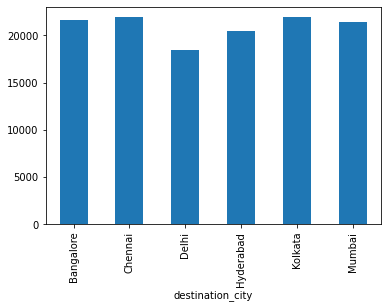

In [16]:
df.groupby("destination_city")['price'].mean().plot.bar()

* Prices of Destination cities mapped to avg prices

([<matplotlib.patches.Wedge at 0x2060e4f3be0>,
 [Text(0.8809535489223089, 0.6587266843245301, 'Delhi'),
  Text(-0.3779004059372413, 1.0330495066512875, 'Mumbai'),
  Text(-1.0992131326110681, 0.04159914777206989, 'Bangalore'),
  Text(-0.6015577367721227, -0.9209388086781889, 'Kolkata'),
  Text(0.36016745105880016, -1.0393649056985748, 'Hyderabad'),
  Text(1.0109871514258975, -0.43348007987882137, 'Chennai')],
 [Text(0.4805201175939866, 0.35930546417701636, '20.4%'),
  Text(-0.20612749414758613, 0.5634815490825203, '20.3%'),
  Text(-0.5995707996060371, 0.02269044423931085, '17.3%'),
  Text(-0.32812240187570324, -0.5023302592790121, '15.4%'),
  Text(0.19645497330480005, -0.5669263121992225, '13.6%'),
  Text(0.5514475371413986, -0.23644367993390253, '12.9%')])

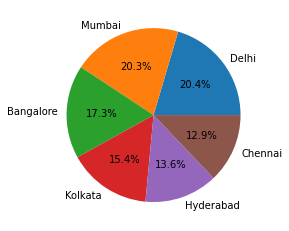

In [17]:
scity=df['source_city'].value_counts()
plt.pie(scity.values,labels=scity.index,autopct='%1.1f%%')

## Does price vary with Airlines?

In [18]:
average_price_by_airline = df.groupby('airline')['price'].mean()
print("Average price by airline:")
print(average_price_by_airline)

Average price by airline:
airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64


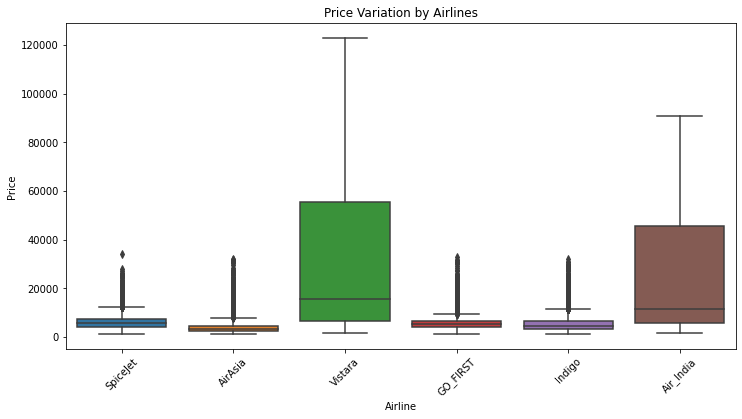

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=df)
plt.xticks(rotation=45)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Variation by Airlines')
plt.show()

Answer: It seems that Vistara and Air India have a higher price range.

## How are ticket prices affected when tickets are bought 1 or 2 days before flight?

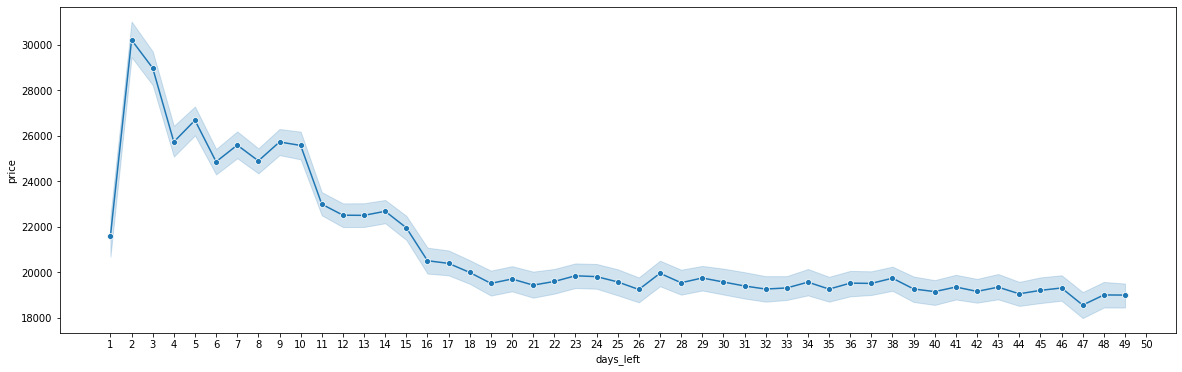

In [20]:
plt.figure(figsize=(20,6))
g = sns.lineplot(x='days_left', y='price', data=df, marker='o')
g.set_xticks(range(1,51, 1))
plt.show()

Answer: On average ticket prices are the highest when bought 2 days before a flight

## Does ticket price change based on the departure time and arrival time?

In [21]:
average_price_by_time = df.groupby(['departure_time', 'arrival_time'])['price'].mean()
print("Average price by departure time and arrival time:")
print(average_price_by_time)

Average price by departure time and arrival time:
departure_time  arrival_time 
Afternoon       Afternoon        14741.746011
                Early_Morning    21159.511401
                Evening          15548.836651
                Late_Night       10811.615662
                Morning          26056.580994
                Night            19097.798757
Early_Morning   Afternoon        16564.731082
                Early_Morning     9540.191523
                Evening          24804.077441
                Late_Night       29638.037500
                Morning          12299.838792
                Night            25792.007764
Evening         Afternoon        25569.672277
                Early_Morning    18175.929529
                Evening          24612.547643
                Late_Night        8547.029235
                Morning          28326.216482
                Night            15641.705242
Late_Night      Afternoon        18520.684932
                Early_Morning     4548.700599


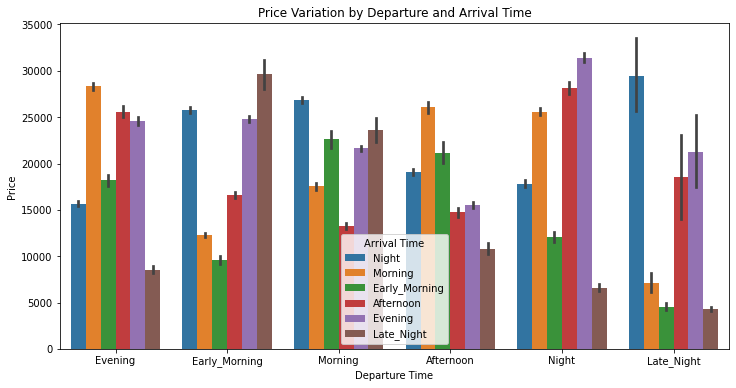

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='departure_time', y='price', hue='arrival_time', data=df)
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.title('Price Variation by Departure and Arrival Time')
plt.legend(title='Arrival Time')
plt.show()

Answer: 
* Early Morning arrivals seem to have a lower price range and median price overall
* Late night arrival have the smallest price range and the lowest median price overall
* Late night departures alsos have the smalles price range and smalles median price

## How the price changes with change in Source and Destination?

In [23]:
average_price_by_route = df.groupby(['source_city', 'destination_city'])['price'].mean()
print("Average price by source and destination:")
print(average_price_by_route)

Average price by source and destination:
source_city  destination_city
Bangalore    Chennai             23321.850078
             Delhi               17723.313972
             Hyderabad           21226.121192
             Kolkata             23500.061229
             Mumbai              23128.618672
Chennai      Bangalore           25081.850454
             Delhi               18981.863948
             Hyderabad           21591.345404
             Kolkata             22669.932407
             Mumbai              22765.849647
Delhi        Bangalore           17880.216315
             Chennai             19369.881354
             Hyderabad           17347.288379
             Kolkata             20566.409418
             Mumbai              19355.829812
Hyderabad    Bangalore           21347.177998
             Chennai             21848.065989
             Delhi               17243.945685
             Kolkata             20823.893201
             Mumbai              20080.865759
Kolkata  

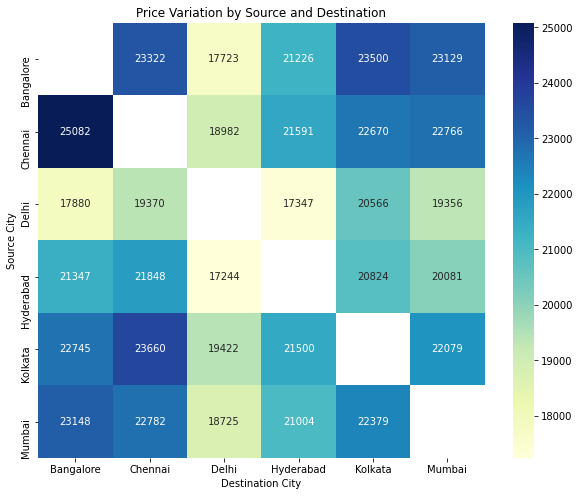

In [24]:
pivot_table = df.pivot_table(index='source_city', columns='destination_city', values='price', aggfunc=np.mean)
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.xlabel('Destination City')
plt.ylabel('Source City')
plt.title('Price Variation by Source and Destination')
plt.show()

## How does the ticket price vary between Economy and Business class?

In [25]:
average_price_by_class = df.groupby('class')['price'].mean()
print("Average price by class:")
print(average_price_by_class)


Average price by class:
class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64


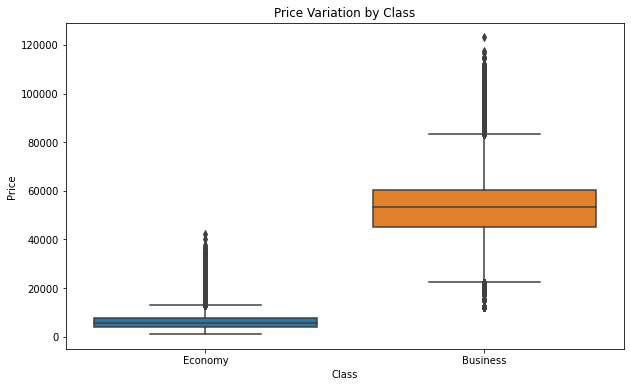

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='price', data=df)
plt.xlabel('Class')
plt.ylabel('Price')
plt.title('Price Variation by Class')
plt.show()

Answer: It is clear that prices are higher in Business Class

## How are ticket prices affected when tickets are bought 1 or 2 days before flight?

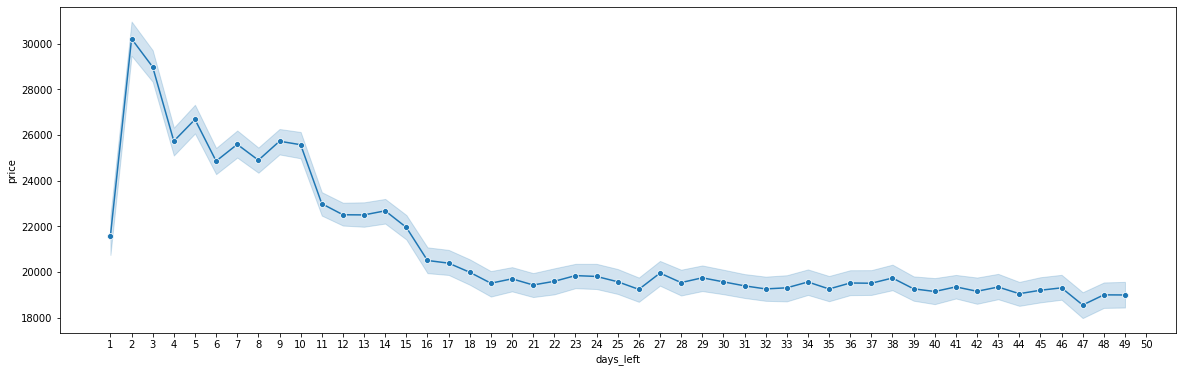

In [27]:
plt.figure(figsize=(20,6))
g = sns.lineplot(x='days_left', y='price', data=df, marker='o')
g.set_xticks(range(1,51, 1))
plt.show()

Answer: On average ticket prices are the highest when bought 2 days before a flight


In [28]:
df[['airline_code', 'flight_number']] = df['flight'].str.split('-', n=1, expand=True)
df.drop("flight", axis = 1, inplace = True)
df.drop("airline_code", axis = 1, inplace = True)
df['flight_number'] = df['flight_number'].astype('int')

In [29]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_number
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8709
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8157
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,764
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,995
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,963


## MODELLING

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  

In [31]:
df['stops'] = df['stops'].replace({'one': 1,
                                   'zero': 0,
                                   'two_or_more': 2})

In [32]:
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

In [33]:
x = df.drop('price', axis = 1)
y = df['price']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

### LINEAR REGRESSION

In [35]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(x_train,y_train)

LinearRegression()

In [36]:
linearreg.intercept_

44289.9437319712

In [37]:
linearreg.coef_

array([ 9.58597025e+02,  1.12161749e+02,  8.10268303e+01,  6.08384356e+03,
        1.74061466e+02,  1.60935398e+02, -4.50702387e+04,  7.46404423e+01,
       -1.28501065e+02,  1.79327766e-02])

In [38]:
y_pred = linearreg.predict(x_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE: {np.sqrt(mean_absolute_error(y_test, y_pred))}")
print(f"R^2: {r2_score(y_test, y_pred)}")

RMSE: 6944.427065048581
MAE: 67.36010267552605
R^2: 0.9059716111977733


In [39]:
lr_score = linearreg.score(x_test,y_test)
lr_score

0.9059716111977733

### DECISION TREE REGRESSION

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 40, min_samples_leaf = 2, min_samples_split = 30)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=30)

In [41]:
y_pred1 = dt.predict(x_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred1))}")
print(f"MAE: {np.sqrt(mean_absolute_error(y_test, y_pred1))}")
print(f"R^2: {r2_score(y_test, y_pred1)}")

RMSE: 2661.641715868743
MAE: 32.548858719687
R^2: 0.9861870849274562


In [42]:
ds_score = dt.score(x_test,y_test)
ds_score

0.9861870849274562

### RANDOM FOREST REGRESSION

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=75)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, random_state=75)

In [44]:
y_pred2 = rf.predict(x_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred2))}")
print(f"MAE: {np.sqrt(mean_absolute_error(y_test, y_pred2))}")
print(f"R^2: {r2_score(y_test, y_pred2)}")

RMSE: 2354.3843439389757
MAE: 31.049912210779333
R^2: 0.9891921110253141


In [45]:
rs_score = rf.score(x_test,y_test)
rs_score

0.9891921110253141

### K-NEIGHBORS

In [46]:
from sklearn.neighbors import KNeighborsRegressor
modelKNN = KNeighborsRegressor(n_neighbors=4)
modelKNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [47]:
y_pred3 = modelKNN.predict(x_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred3))}")
print(f"MAE: {np.sqrt(mean_absolute_error(y_test, y_pred3))}")
print(f"R^2: {r2_score(y_test, y_pred3)}")

RMSE: 16668.4059733525
MAE: 108.67021721325915
R^2: 0.4582807214003426


In [48]:
knn_score = modelKNN.score(x_test,y_test)
knn_score

0.4582807214003426

In [49]:
X_axis_value=['Linear Regression','KNN','Decision Tree Classifaction','Random Forest']
Y_axis_value=[lr_score,knn_score,ds_score,rs_score]

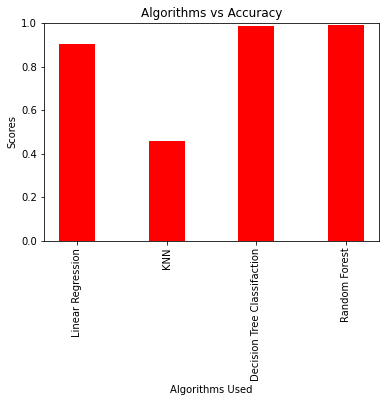

In [50]:
plt.bar(X_axis_value,Y_axis_value,color='red',width=0.4)
plt.xlabel('Algorithms Used')
plt.ylabel('Scores')
plt.title('Algorithms vs Accuracy')
plt.ylim(0,1)
plt.xticks(rotation = 90)
plt.show()

In [51]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

 10%|████████▌                                                                          | 3/29 [00:39<05:30, 12.73s/it]